In [281]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor

price_data = pd.read_csv('data.csv')

In [282]:
def knn_model(data_train, data_test, neighbors=4):
    test_length = len(data_test)
    data_test = data_test[:test_length]
    
    y_pred = np.zeros(test_length, dtype=double)
    y_true = np.zeros(test_length, dtype=double)
    
    for i in range(test_length):
        if i%100 == 0:     
            print "=======Iteration %i=======total %i=====" % (i, test_length)
        X_test, date, y_test = data_test.iloc[i, 0:2].values.reshape(-1,2), data_test.iloc[i, 2], data_test.iloc[i, 3]
        #Filter the data via the date to avoid time leakage
        X_train, y_train = data_train[data_train['close_date'] > date].iloc[:, 0:2].values, \
        data_train[data_train['close_date'] > date].iloc[:, 3].values
        
        #Build model only if enough effective data exists
        if(len(X_train) > neighbors):
            model_neigh = KNeighborsRegressor(n_neighbors=neighbors, weights='distance', n_jobs=-1)
            model_neigh.fit(X_train, y_train)
            y_predict = model_neigh.predict(X_test)
    
            y_pred[i] = y_predict[0]
            y_true[i] = y_test
        else:    #Unable to predict the price due to lack of effective data
            y_pred[i] = -1
            y_true[i] = -1
    
    RAE = np.abs(y_pred - y_true) / y_true
    #Remove rows 
    RAE_wo = RAE[np.nonzero(RAE)]
    MRAE = np.median(RAE)

    data_test.loc[:, 'Prediction'] = pd.Series(y_pred, index=data_test.index)
    data_test.loc[:, 'RAE'] = pd.Series(RAE, index=data_test.index)
    
    return data_test, MRAE



In [283]:
from sklearn.model_selection import train_test_split
#Split the data into train data and test data
data_train, data_test = train_test_split(price_data, test_size=0.01, random_state=42)

data_full, data_MRAE = knn_model(data_train, data_test, 6)  
print(data_MRAE)

=======Iteration 0=======total 881=====
=======Iteration 100=======total 881=====
=======Iteration 200=======total 881=====
=======Iteration 300=======total 881=====
=======Iteration 400=======total 881=====
=======Iteration 500=======total 881=====
=======Iteration 600=======total 881=====
=======Iteration 700=======total 881=====
=======Iteration 800=======total 881=====
0.239022653644


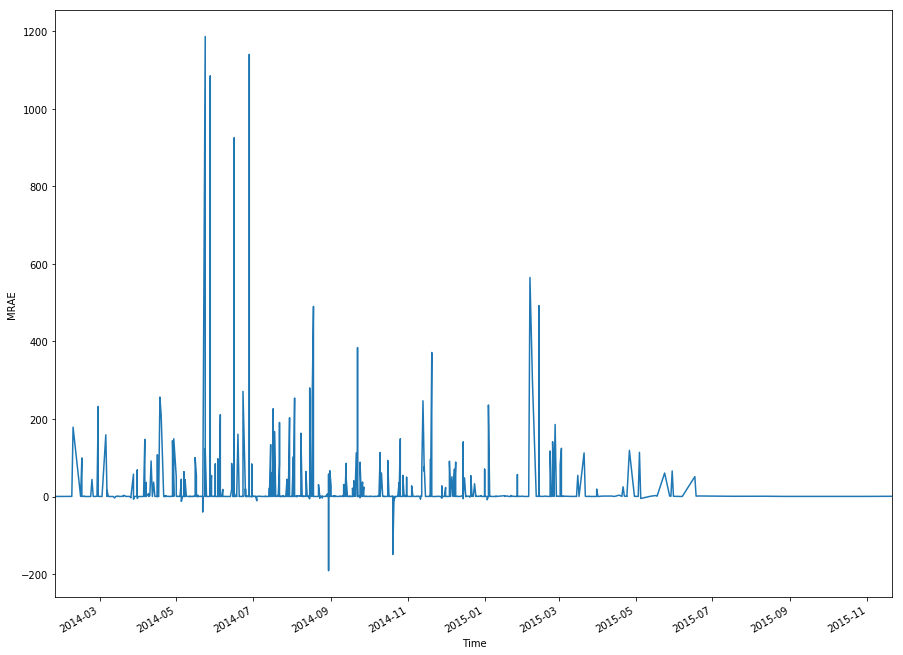

In [286]:
import matplotlib.pyplot as plt

date_index = pd.to_datetime([data_full.iloc[:, 2].values[i].split(' ')[0] for i in range(len(data_full))],
                            format='%Y-%m-%d', errors='raise')
ts = pd.Series(data_full.iloc[:, 5].values, index=date_index)

plt.figure(figsize=(15, 12))
ts.plot()
plt.xlabel('Time')
plt.ylabel('MRAE')

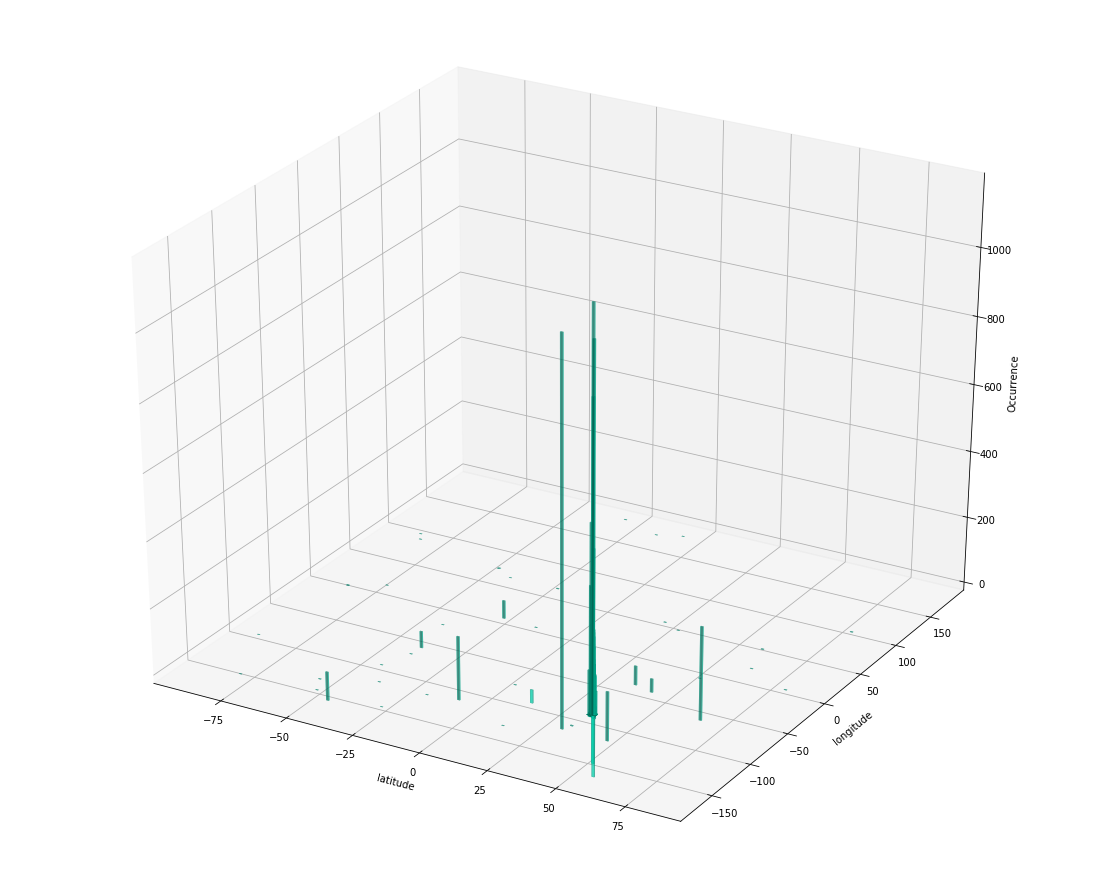

In [285]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 12))
ax = Axes3D(fig)

xpos = data_full.iloc[:, 0].values
ypos = data_full.iloc[:, 1].values
dx = np.ones(len(xpos))
dy = np.ones(len(ypos))
dz  = data_full.iloc[:, 5].values
zpos = np.zeros(len(dz))


ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa', alpha=0.5)
ax.set_xlabel('latitude')
plt.ylabel('longitude')
ax.set_zlabel('Occurrence')
plt.show()

In [291]:
#Use cross validation to choose the optimal k

for kneighbor in range(3, 21):

    kf = KFold(n_splits=10)
    fold = 1
    scores = []
    for train_index, cv_index in kf.split(data_train):
        print "Fold #%s" %fold
        dataf_train, dataf_cv = data_train.loc[train_index], data_train.loc[cv_index]
        dataf_full, dataf_MRAE = knn_model(dataf_train, dataf_cv, kneighbor) 
        scores.append(dataf_MRAE)
        print dataf_MRAE
        fold += 1
        # to speed up only use the first fold 
        break
    scores = np.array(scores)
    print "For k = %i nearest neighbors, the MRAE: %0.5f (+/- %0.5f)" % (kneighbor, scores.mean(), scores.std() * 2)

Fold #1
=======Iteration 0=======total 8717=====
=======Iteration 100=======total 8717=====
=======Iteration 200=======total 8717=====
=======Iteration 300=======total 8717=====
=======Iteration 400=======total 8717=====
=======Iteration 500=======total 8717=====
=======Iteration 600=======total 8717=====
=======Iteration 700=======total 8717=====
=======Iteration 800=======total 8717=====
=======Iteration 900=======total 8717=====
=======Iteration 1000=======total 8717=====
=======Iteration 1100=======total 8717=====
=======Iteration 1200=======total 8717=====
=======Iteration 1300=======total 8717=====
=======Iteration 1400=======total 8717=====
=======Iteration 1500=======total 8717=====
=======Iteration 1600=======total 8717=====
=======Iteration 1700=======total 8717=====
=======Iteration 1800=======total 8717=====
=======Iteration 1900=======total 8717=====
=======Iteration 2000=======total 8717=====
=======Iteration 2100=======total 8717=====
=======Iteration 2200=======total 87